<a href="https://colab.research.google.com/github/perfectpanda-works/machine-learning/blob/master/LEARNING_PYTORCH_WITH_EXAMPLES2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
import torch

dtype = torch.float
#device = torch.device("cpu")
#ColaboでGPUを利用する場合、「ランタイム」->「ランタイムのタイプの変更」->「ハードウェアアクセラレータ」をGPUに変更
device = torch.device("cuda:0") # Uncomment this to run on GPU

#ここで「cuda:0」とでるとGPU利用、「CPU」とでるとCPUで動作している。
print(device)

cuda:0


In [ ]:
# N  　：バッチサイズ
# D_in ：入力次元数
# H　　：隠れ層の次元数
# D_out：出力次元数
N, D_in, H, D_out = 64, 1000, 100, 10

# ランダムな入力データと出力データの作成
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# 重みをランダムに初期化
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

#損失記録用のリスト
loss_list = []

#学習率 0.000001
learning_rate = 1e-6
for t in range(500):
    #①順伝播（yを予測するフェーズ）
    #重みw1とxの掛け算（行列の掛け算）
    h = x.mm(w1)
    #活性化関数reluを適用
    h_relu = h.clamp(min=0)
    #中間層の出力にw2の重みを掛け算して予測出力を得る
    y_pred = h_relu.mm(w2)

    #二乗誤差の計算と、誤差の表示
    loss = (y_pred - y).pow(2).sum().item()
    loss_list.append(loss)
    if t % 100 == 99:
        print(t, loss)

    #逆伝播：w2とw1の勾配を計算する。
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    #重みの更新(確率的勾配効果法)
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

99 593.8939208984375
199 3.438877582550049
299 0.034401785582304
399 0.000703345809597522
499 8.761504432186484e-05


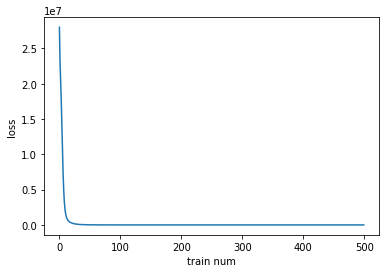

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel("train num")
plt.ylabel("loss")
plt.plot(range(500),loss_list)